<a href="https://colab.research.google.com/github/vikas2308/-AdEase-Time-Series/blob/main/AdEase_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AdEase Time Series**

**Colab Link:**  https://colab.research.google.com/drive/1ZqgKwVBJGAalOgkyK2LExpYhZoQTjU8s#scrollTo=XMqMbK2RHfGy

Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.

**Dataset:**

https://drive.google.com/drive/folders/1mdgQscjqnCtdg7LGItomyK0abN6lcHBb



**Data Dictionary:**

**There are two csv files given**

train_1.csv: In the csv file, each row corresponds to a particular article and each column corresponds to a particular date. The values are the number of visits on that date.

**The page name contains data in this format:**

SPECIFIC NAME _ LANGUAGE.wikipedia.org _ ACCESS TYPE _ ACCESS ORIGIN

having information about the page name, the main domain, the device type used to access the page, and also the request origin(spider or browser agent)

Exog_Campaign_eng: This file contains data for the dates which had a campaign or significant event that could affect the views for that day. The data is just for pages in English.

There’s 1 for dates with campaigns and 0 for remaining dates. It is to be treated as an exogenous variable for models when training and forecasting data for pages in English

**Concepts Tested:**

*   Exploratory data analysis

*   Time Series forecasting- ARIMA, SARIMAX, and Prophet

**Problem statements**

You are working in the Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm

**Read Data & Data Formatting**

In [ ]:
!gdown 19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE

Downloading...
From: https://drive.google.com/uc?id=19qvuu7E8yD63o4WkOdy_lLFSrZlZPpuE
To: /content/Exog_Campaign_eng
100% 1.10k/1.10k [00:00<00:00, 4.38MB/s]


In [ ]:
!gdown 1qQkymAitU6l2pSe702rDUhQpoP8MUZXl

Downloading...
From (original): https://drive.google.com/uc?id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl
From (redirected): https://drive.google.com/uc?id=1qQkymAitU6l2pSe702rDUhQpoP8MUZXl&confirm=t&uuid=5cf8699c-740c-4bc3-b1cb-a33ebb68ec15
To: /content/train_1.csv
100% 278M/278M [00:03<00:00, 88.9MB/s]


In [ ]:
exog = pd.read_csv("/content/Exog_Campaign_eng")
exog

,Exog
0,0
1,0
2,0
3,0
4,0
...,...
545,1
546,1
547,1
548,0


In [ ]:
exog.head()

,Exog
0,0
1,0
2,0
3,0
4,0


In [ ]:
exog["Exog"]

0      0
1      0
2      0
3      0
4      0
      ..
545    1
546    1
547    1
548    0
549    0
Name: Exog, Length: 550, dtype: int64

In [ ]:
exog.shape

(550, 1)

In [ ]:
Data = pd.read_csv("/content/train_1.csv")
Data

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Data.shape

(145063, 551)

In [ ]:
Data.head(5)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
df = Data.copy(deep=True)

In [ ]:
df.isnull().any(axis=1).sum()

27786

**Data formatting**

SPECIFIC NAME _ LANGUAGE.wikipedia.org _ACCESS TYPE_ACCESS ORIGIN

Separating different values from it like title, language, access type, and access origin.

In [ ]:
# access type and access origin.
temp = df["Page"].str.extract(r"wikipedia\.org_([A-Za-z-_]+)")[0]
temp = temp.str.split("_", expand=True)
temp = pd.concat([temp,df], axis=1).rename(columns={0:"access_type",1:"access_origin"})
lang = temp["Page"].str.extract(r"_([A-Za-z]{2}).wikipedia.org_")
temp = pd.concat([lang,temp], axis=1).rename(columns={0:"language"})
temp["Page"]=temp["Page"].str.replace(r"(_[A-Za-z]{2}.wikipedia.[A-Za-z_-]+)","",regex=True)
temp = temp.rename(columns={"Page":"title"})
df = temp.copy(); df.head()

,language,access_type,access_origin,title,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,zh,all-access,spider,2NE1,18.0,11.0,5.0,13.0,14.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,zh,all-access,spider,2PM,11.0,14.0,15.0,18.0,11.0,13.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,zh,all-access,spider,3C,1.0,0.0,1.0,1.0,0.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,zh,all-access,spider,4minute,35.0,13.0,10.0,94.0,4.0,26.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,zh,all-access,spider,52_Hz_I_Love_You,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
language_dict = {"es":"spanish", "zh":"chinese", "ru":"russian", "fr":"french", "de":"german", "en":"english", "ja":"japanese"}
df["language"]=df["language"].map(language_dict)

In [ ]:
df.head()

,language,access_type,access_origin,title,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,chinese,all-access,spider,2NE1,18.0,11.0,5.0,13.0,14.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,chinese,all-access,spider,2PM,11.0,14.0,15.0,18.0,11.0,13.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,chinese,all-access,spider,3C,1.0,0.0,1.0,1.0,0.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,chinese,all-access,spider,4minute,35.0,13.0,10.0,94.0,4.0,26.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,chinese,all-access,spider,52_Hz_I_Love_You,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


**Checking null values and understanding their reason**

In [ ]:
print(df.isnull().any(axis=1).sum()/df.shape[0]*100,"% null rows")

25.477206455126396 % null rows


<Axes: xlabel='title'>

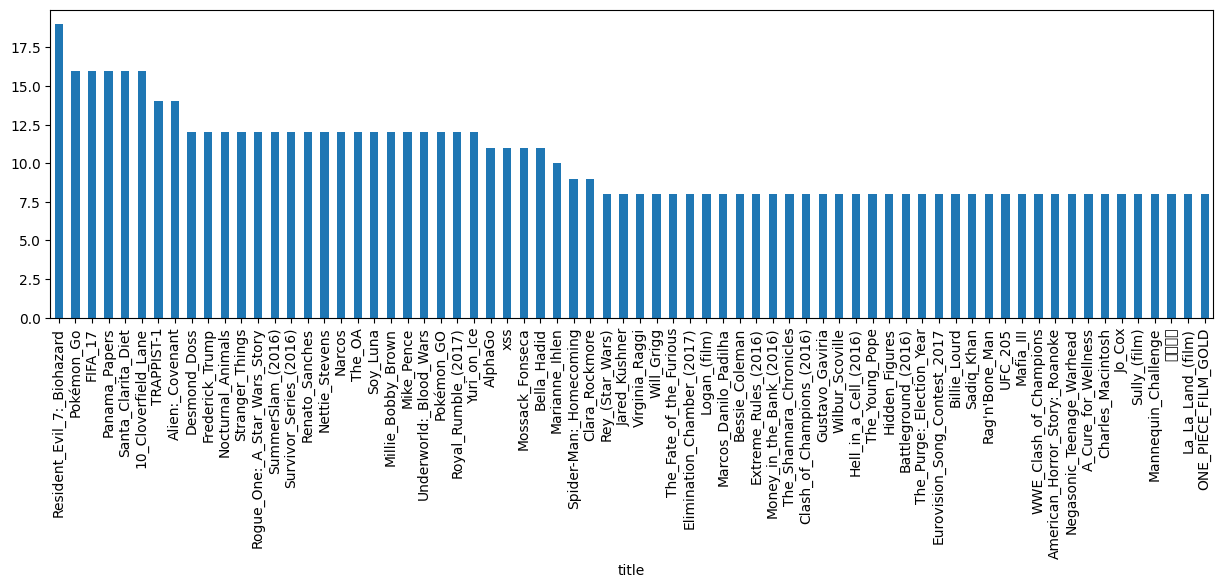

In [ ]:
df[df.isnull().any(axis=1)]["title"].value_counts()[:70].plot(kind="bar", figsize=(15,4))

**Null rows have mostly gaming category titles**

In [ ]:
df.dropna().shape[0]/df.shape[0]

0.7452279354487361

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(108105, 554)

**Exploratory Data Analysis**


**language: bar plot**

<Axes: ylabel='language'>

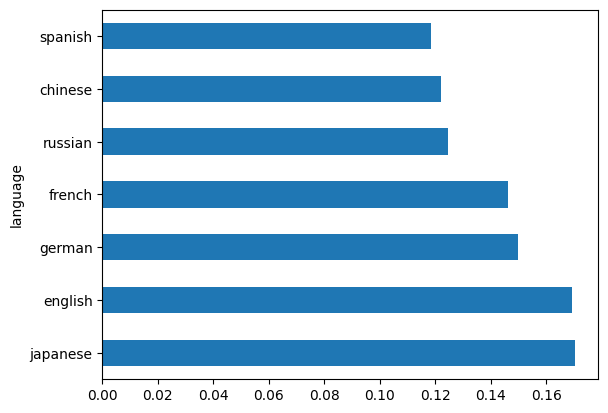

In [ ]:
df["language"].value_counts(normalize=True).plot(kind="barh")

**access_type: bar plot**

<Axes: ylabel='access_type'>

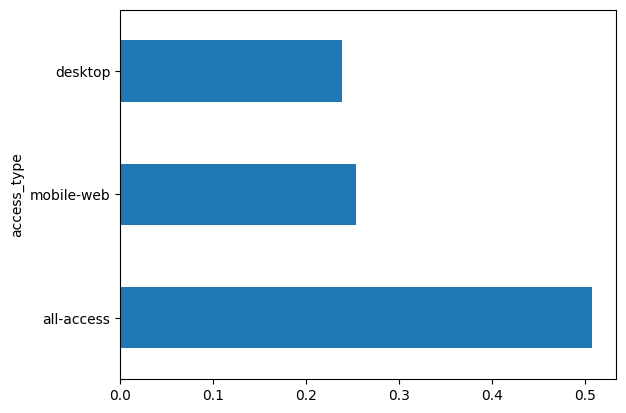

In [ ]:
df["access_type"].value_counts(normalize=True).plot(kind="barh")

**access origin: bar plot**

<Axes: ylabel='access_origin'>

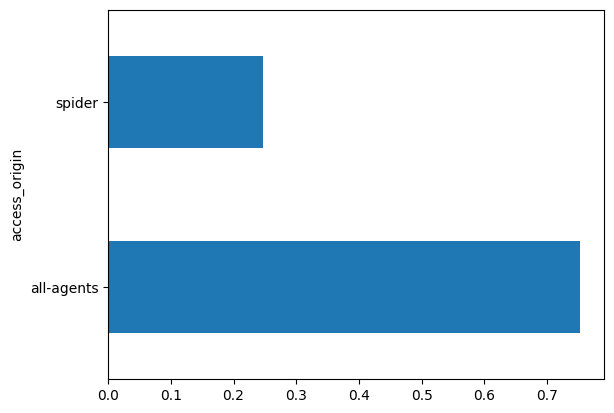

In [ ]:
df["access_origin"].value_counts(normalize=True).plot(kind="barh")

**Converting the data to a format that can be fed to the Arima model**

In [ ]:
df.head(5)

,language,access_type,access_origin,title,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,chinese,all-access,spider,2NE1,18.0,11.0,5.0,13.0,14.0,9.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,chinese,all-access,spider,2PM,11.0,14.0,15.0,18.0,11.0,13.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,chinese,all-access,spider,3C,1.0,0.0,1.0,1.0,0.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,chinese,all-access,spider,4minute,35.0,13.0,10.0,94.0,4.0,26.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
5,chinese,all-access,spider,5566,12.0,7.0,4.0,5.0,20.0,8.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0


In [ ]:
df.columns[4:]

Index(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05',
       '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
       ...
       '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
       '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31'],
      dtype='object', length=550)

In [ ]:
df_group = df.groupby(["language"])[df.columns[4:]].median()

In [ ]:
data_TimeSeries = df_group.T

In [ ]:
data_TimeSeries.index = np.vectorize(lambda x: np.datetime64(x))(data_TimeSeries.index)

In [ ]:
data_TimeSeries.shape

(550, 7)

In [ ]:
data_TimeSeries["exog"]=exog["Exog"].values

In [ ]:
data_TimeSeries.tail()

language,chinese,english,french,german,japanese,russian,spanish,exog
2016-12-27,122.0,975.0,210.0,194.0,242.0,352.0,234.0,1
2016-12-28,122.0,944.0,211.0,196.0,230.0,337.0,242.0,1
2016-12-29,115.0,961.0,207.0,189.0,245.0,323.0,235.0,1
2016-12-30,113.0,922.0,211.0,182.0,252.0,294.0,209.0,0
2016-12-31,109.0,853.0,183.0,150.0,236.0,233.0,162.0,0


**Time Series plot: all 7 languages**

Text(0, 0.5, 'median_views')

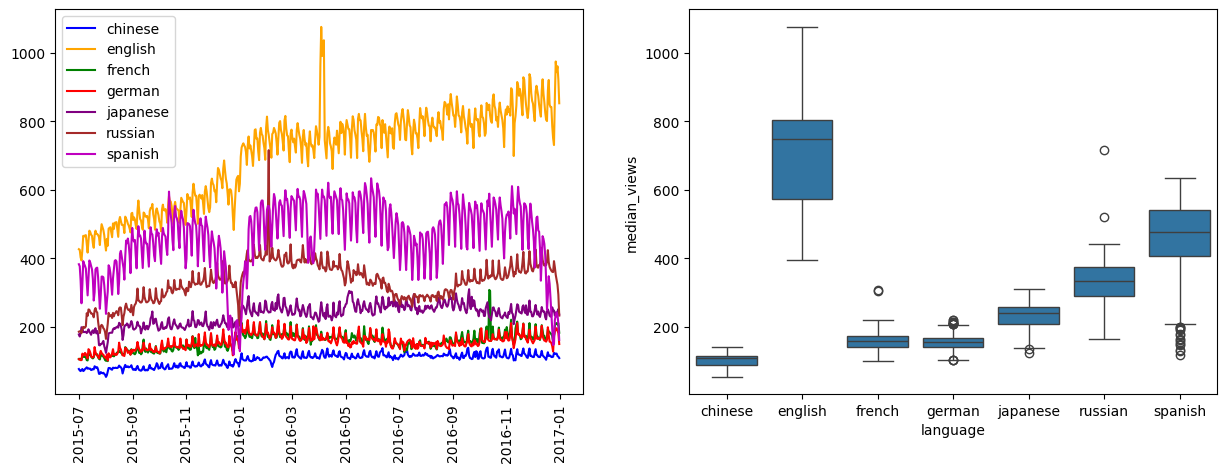

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
lang = list(data_TimeSeries.columns[:-1]); clr = ["blue","orange","green","red","purple","brown","m"]
for i in range(len(lang)):
    plt.plot(data_TimeSeries.index, data_TimeSeries[lang[i]], color=clr[i], label=lang[i])
plt.legend(); plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.boxplot(data=data_TimeSeries.reset_index().melt(id_vars=["index"],value_vars=data_TimeSeries.columns[:-1]).set_index("index"), y="value",x="language")
plt.ylabel("median_views")

In [ ]:
data_TimeSeries.median(axis=0).sort_values(ascending=False)/data_TimeSeries.median(axis=0).sort_values(ascending=False).sum()

language
english     0.336551
spanish     0.214414
russian     0.149978
japanese    0.108217
french      0.071396
german      0.070049
chinese     0.049394
exog        0.000000
dtype: float64

<Axes: ylabel='language'>

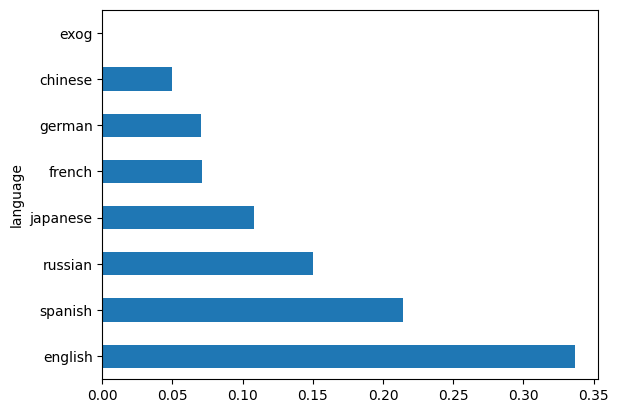

In [ ]:
(data_TimeSeries.median(axis=0).sort_values(ascending=False)/data_TimeSeries.median(axis=0).sort_values(ascending=False).sum()).plot(kind="barh")

Most viewed page by languges are english(33.65%), spanish(21.44%), russian(15%), japanese(10.8%), french(7.13%), german(7%), chinese(5%)

**Stationarity[ Augmented Dickey-Fuller (ADF) test ]: checking if the data is stationary**

In [ ]:
# import statsmodels.api as sm

In [ ]:
sm.tsa.stattools.adfuller(data_TimeSeries["english"])

(-1.5337596068591974,
 0.5167497879782426,
 19,
 530,
 {'1%': -3.4427485933555886,
  '5%': -2.8670087381529723,
  '10%': -2.569682641509434},
 5062.231417057528)

In [ ]:
for col in data_TimeSeries.columns[:-1]:
    pvalue = sm.tsa.stattools.adfuller(data_TimeSeries[col])[1]
    if pvalue >= 0.05:
        print(col,": Sequence is not stationary")
    else:
        print(col, ": Sequence is stationary")

chinese : Sequence is not stationary
english : Sequence is not stationary
french : Sequence is not stationary
german : Sequence is not stationary
japanese : Sequence is not stationary
russian : Sequence is not stationary
spanish : Sequence is stationary


only spanish Time-Series data is stationary

In [ ]:
def adf_test(data, significance_level=0.05):
    pvalue = sm.tsa.stattools.adfuller(data)[1]
    if pvalue <= significance_level:
        print('Sequence is stationary')
    else:
        print('Sequence is not stationary')

**Decomposition and Differencing the time-series**

**Decomposition: time-series data "english"**

In [ ]:
model_decompose = sm.tsa.seasonal_decompose(data_TimeSeries["english"], model='additive')

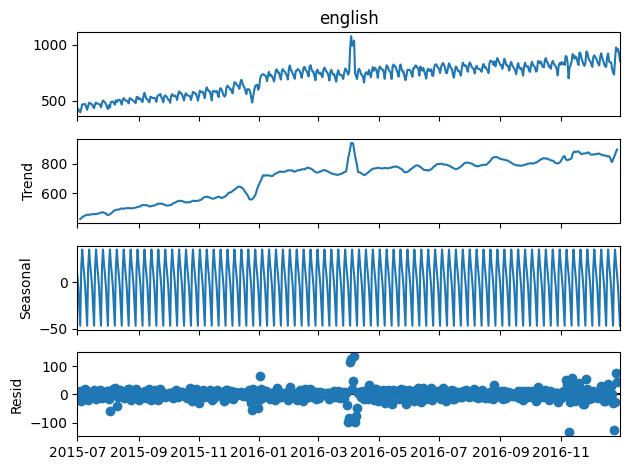

In [ ]:
temp = model_decompose.plot()

<Axes: >

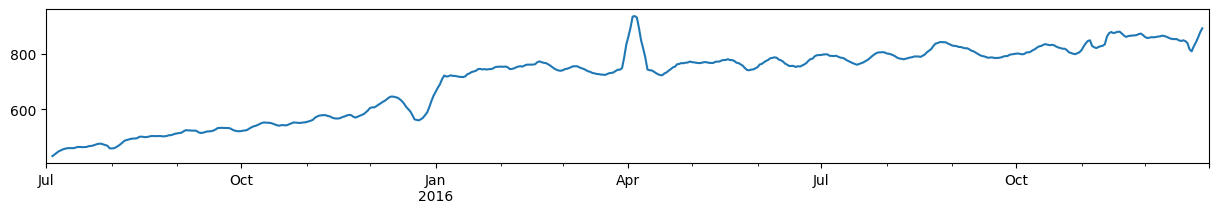

In [ ]:
model_decompose.trend.plot(figsize=(15,2))

<Axes: >

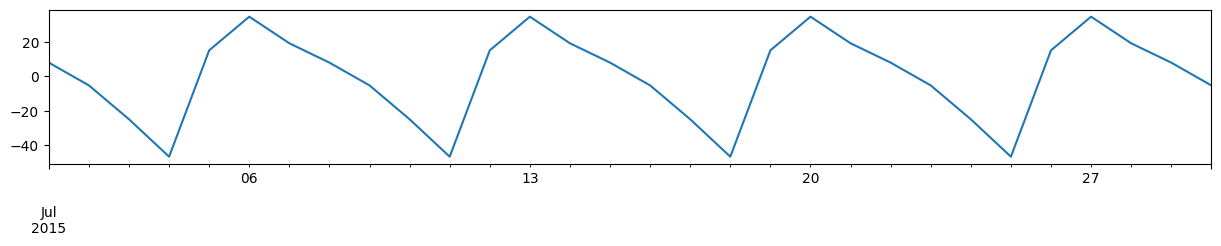

In [ ]:
model_decompose.seasonal[:30].plot(figsize=(15,2))

<Axes: ylabel='Density'>

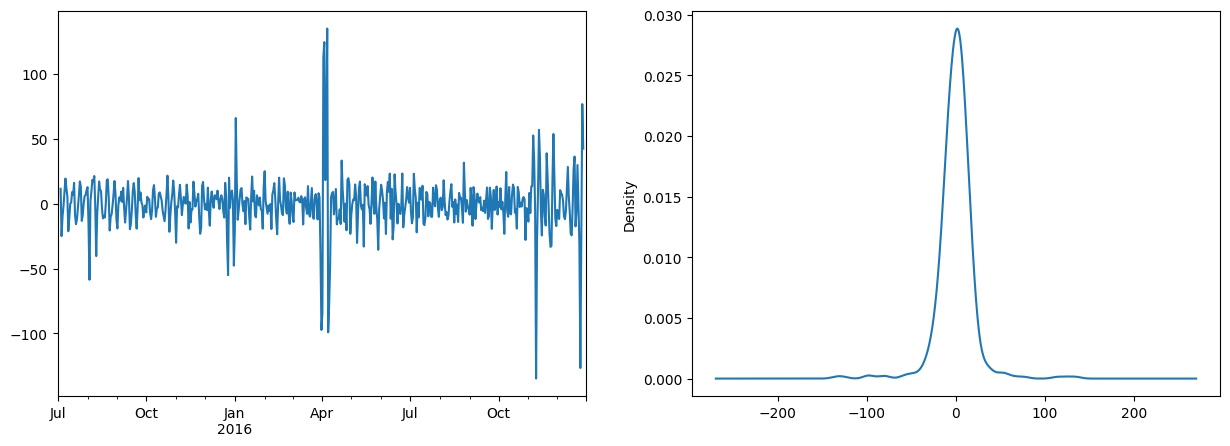

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
model_decompose.resid.plot()
plt.subplot(1,2,2)
model_decompose.resid.plot(kind="kde")

**Decomposition From Scratch**

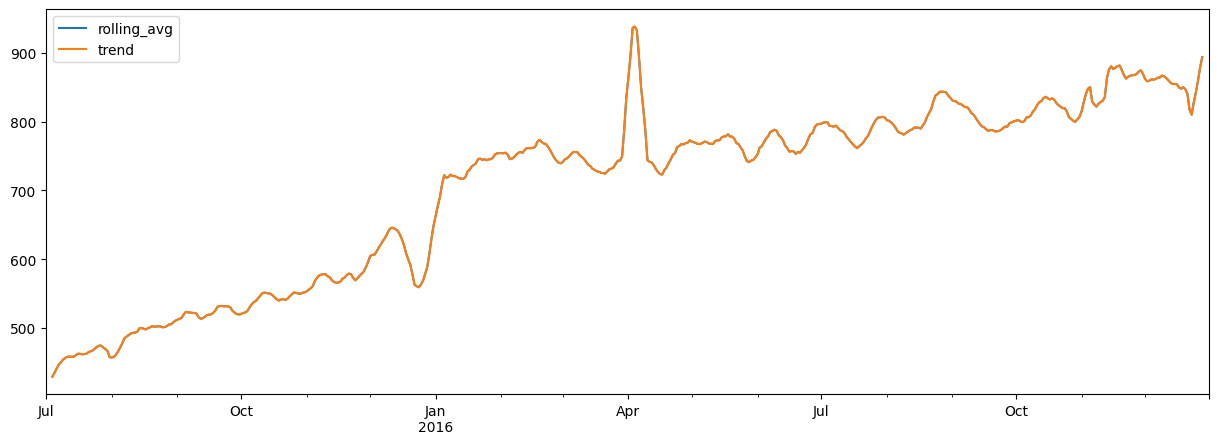

In [ ]:
trend_temp = data_TimeSeries["english"].rolling(7, center=True).mean()  # temporary
plt.figure(figsize=(15,5))
trend_temp.plot(label="rolling_avg")
model_decompose.trend.plot()
plt.legend()

<Axes: >

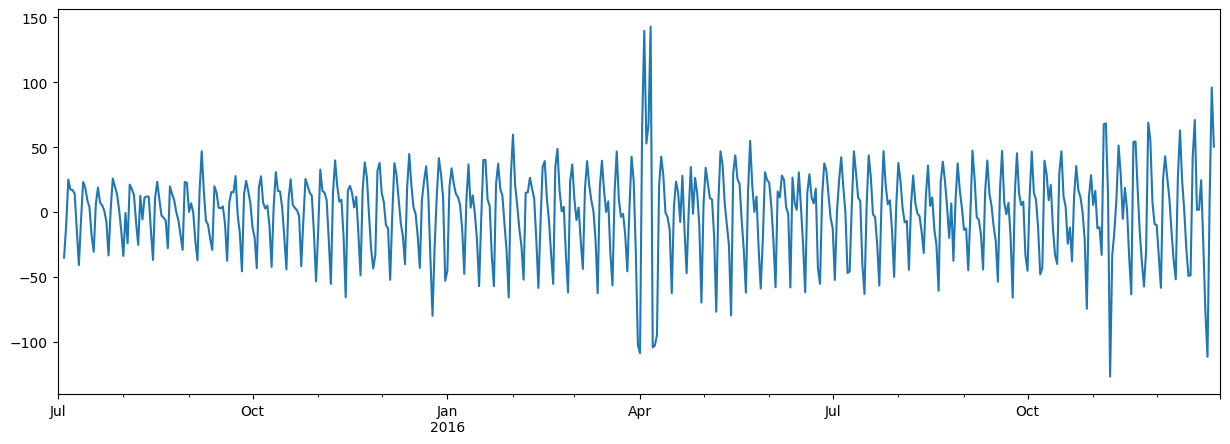

In [ ]:
de_trend = data_TimeSeries["english"] - trend_temp
de_trend.plot(figsize=(15,5))

In [ ]:
de_trend.reset_index().head()

,index,english
0,2015-07-01,NaN
1,2015-07-02,NaN
2,2015-07-03,NaN
3,2015-07-04,-35.142857
4,2015-07-05,-9.857143


<Axes: xlabel='index'>

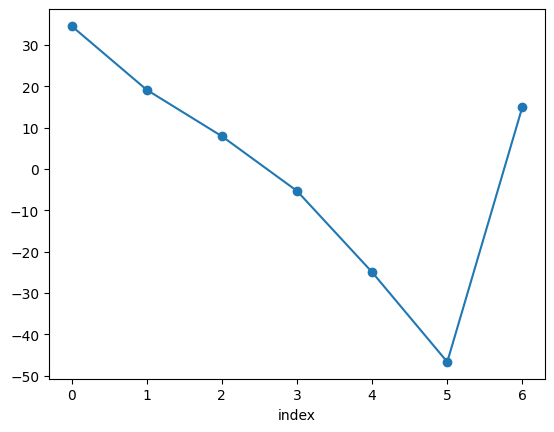

In [ ]:
dtf = de_trend.reset_index()
dtf.groupby(dtf["index"].dt.day_of_week)['english'].mean().plot(style='-o')

<Axes: >

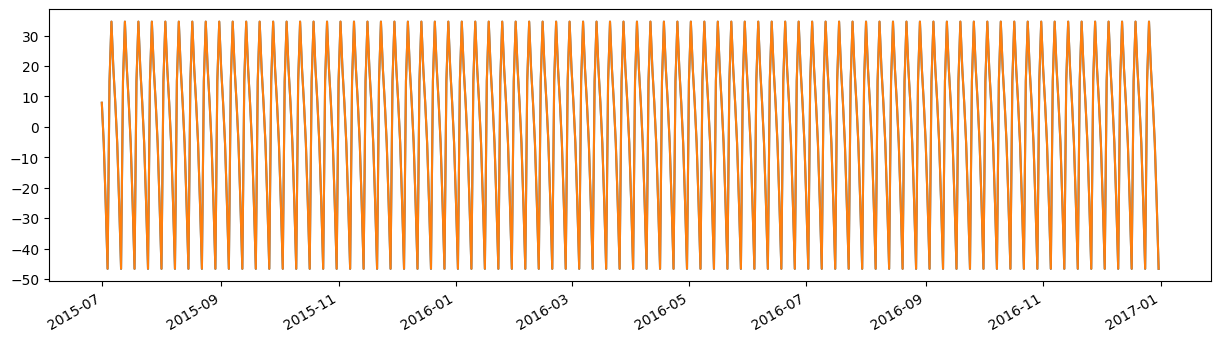

In [ ]:
plt.figure(figsize=(15,4))
plt.plot(dtf["index"], dtf.groupby(dtf["index"].dt.day_of_week)['english'].transform('mean'))
model_decompose.seasonal.plot() #plots exactly fits

**Differencing: time-series data "english"**

<Axes: >

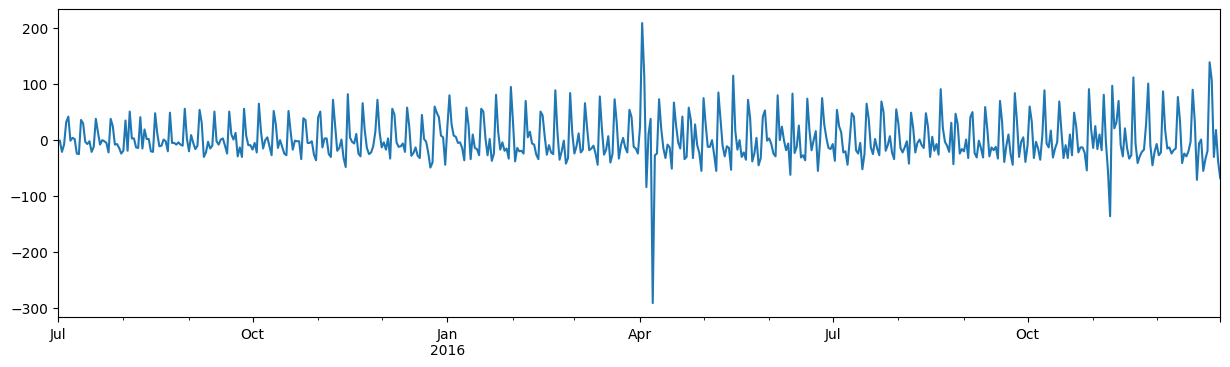

In [ ]:
data_TimeSeries["english"].diff().plot(figsize=(15,4))

In [ ]:
adf_test(data_TimeSeries["english"].diff().dropna())

Sequence is stationary


**Plotting the ACF and PACF plots**

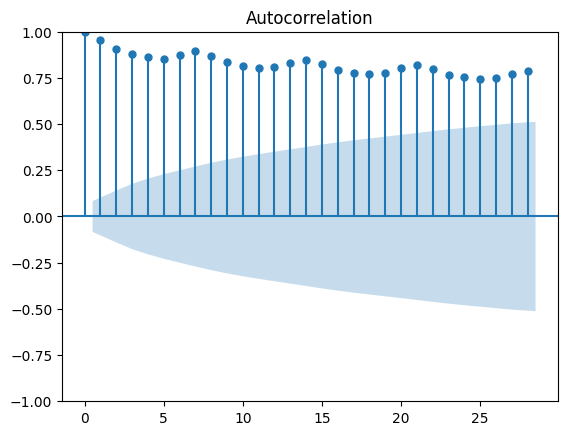

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
z = plot_acf(data_TimeSeries["english"])

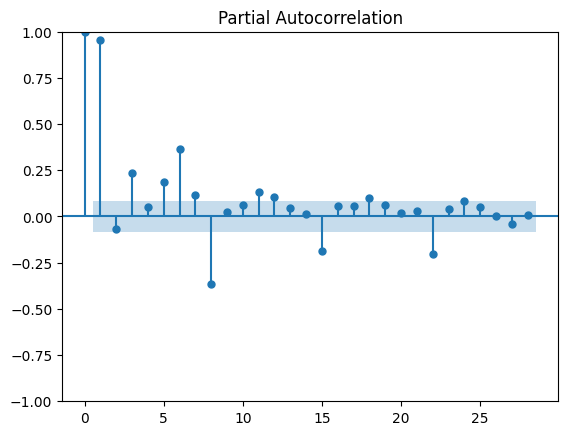

In [ ]:
y = plot_pacf(data_TimeSeries["english"], lags = None)

**ACF**

*   If the ACF shows a sharp cutoff after lag 'k', it suggests that an AR(k) model may be appropriate.
*   If the ACF decreases gradually, it suggests a non-stationary series, and differencing (d) may be needed.
*   If the ACF has a sinusoidal pattern or fluctuates around zero, it suggests a seasonal component.
The ACF shows a sharp cutoff after lag 0, it suggests that an AR(0) model may be appropriate.

**PACF**

*   If the PACF has a sharp cutoff after lag 'k', it suggests an MA(k) model may be appropriate.
*   If the PACF gradually decreases, it suggests an AR component.
*   If there are significant spikes at seasonal lags, it suggests a seasonal AR or MA component.
*   The PACF has a sharp cutoff after lag 0, it suggests an MA(0) model may be appropriate.

**Modelling**


**Train-Test-Split**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
train_x = data_TimeSeries.loc[data_TimeSeries.index[:-61]]

In [ ]:
test_x = data_TimeSeries.loc[data_TimeSeries.index[-61:]]

In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))

**Creating and training the Arima model**

In [ ]:
train_x["english"].head()

2015-07-01    427.0
2015-07-02    425.0
2015-07-03    403.0
2015-07-04    394.0
2015-07-05    425.0
Name: english, dtype: float64

In [ ]:
adf_test(train_x["english"])

Sequence is not stationary


In [ ]:
adf_test(train_x["english"].diff(1).dropna())

Sequence is stationary


In [ ]:
pred = pd.DataFrame(index=test_x.index)

**grid search**

In [ ]:
ar = [8,9,10]
ma = [4,5,6]

In [ ]:
result = []
for p in ar:
    for q in ma:
        model_temp = SARIMAX(train_x["english"], order=(p, 1, q))
        model_temp = model_temp.fit(disp=False)
        result.append([p,q,round(mape(test_x["english"], model_temp.forecast(steps=61)), 3)])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

In [ ]:
pd.DataFrame(result, columns=["p","q","mape"]).sort_values(by="mape",ascending=True)

,p,q,mape
4,9,5,0.067
8,10,6,0.067
5,9,6,0.068
1,8,5,0.068
2,8,6,0.069
7,10,5,0.073
3,9,4,0.077
6,10,4,0.080
0,8,4,0.081


p=9,q=5 are best param

In [ ]:
model_ARIMA = SARIMAX(train_x["english"], order=(9, 1, 5))
model_ARIMA = model_ARIMA.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
pred["english"] = model_ARIMA.forecast(steps=61)

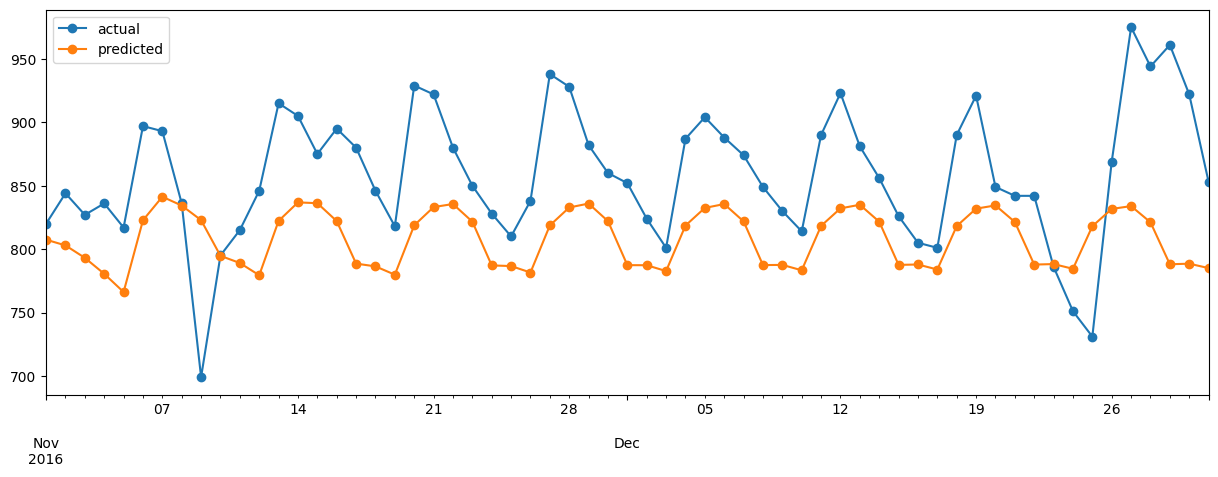

In [ ]:
test_x["english"].plot(style="-o",figsize=(15,5), label="actual")
pred["english"].plot(style="-o",label="predicted")
plt.legend()

In [ ]:
performance(test_x["english"], pred["english"])

MAE : 58.276
RMSE : 68.523
MAPE: 0.067


**Getting the exogenous variable and using it to train a sarimax model**

**grid search**

In [ ]:
ar_seasonal = [2,3]
ma_seasonal = [2,3]

result = []
exog_forecast = test_x[['exog']]  # requires two brackets to yield a shape of 2D
for P in ar_seasonal:
    for Q in ma_seasonal:
        model = SARIMAX(train_x["english"], exog=train_x['exog'], order=(9,1,5),seasonal_order=(P,1,Q,14))
        model = model.fit(disp=False)
        predictions_ = model.predict(start=test_x.index[0], end=test_x.index[-1], exog=exog_forecast).rename('Predictions')
        result.append([P,Q,round(mape(test_x["english"], predictions_), 3)])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  

In [ ]:
pd.DataFrame(result, columns=["P","Q","mape"]).sort_values(by="mape",ascending=True)

,P,Q,mape
1,2,3,0.044
0,2,2,0.045
3,3,3,0.045
2,3,2,0.047


P=2 & Q=3 are best param

In [ ]:
model = SARIMAX(train_x["english"], exog=train_x['exog'], order=(9,1,5),seasonal_order=(2,1,3,14))
model = model.fit(disp=False)

exog_forecast = test_x[['exog']]  # requires two brackets to yield a shape of 2D
predictions = model.predict(start=test_x.index[0], end=test_x.index[-1], exog=exog_forecast).rename('Predictions')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


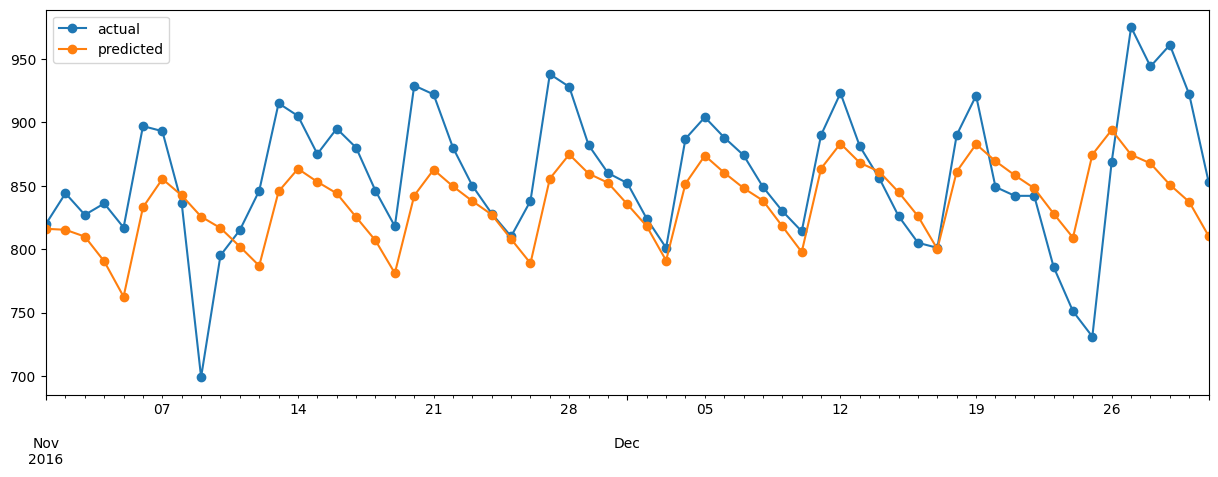

In [ ]:
test_x["english"].plot(style="-o",figsize=(15,5), label="actual")
predictions.plot(style="-o",label="predicted")
plt.legend()

In [ ]:
performance(test_x["english"], predictions)

MAE : 37.861
RMSE : 49.014
MAPE: 0.044


**confidence interval - 95%**

In [ ]:
model.get_forecast(steps=61, exog=exog_forecast).conf_int(0.05).values[:5]

array([[772.26523737, 859.73172475],
       [757.05305137, 873.4014616 ],
       [744.96292077, 874.74454604],
       [718.08811213, 862.607063  ],
       [684.39718351, 840.56551623]])

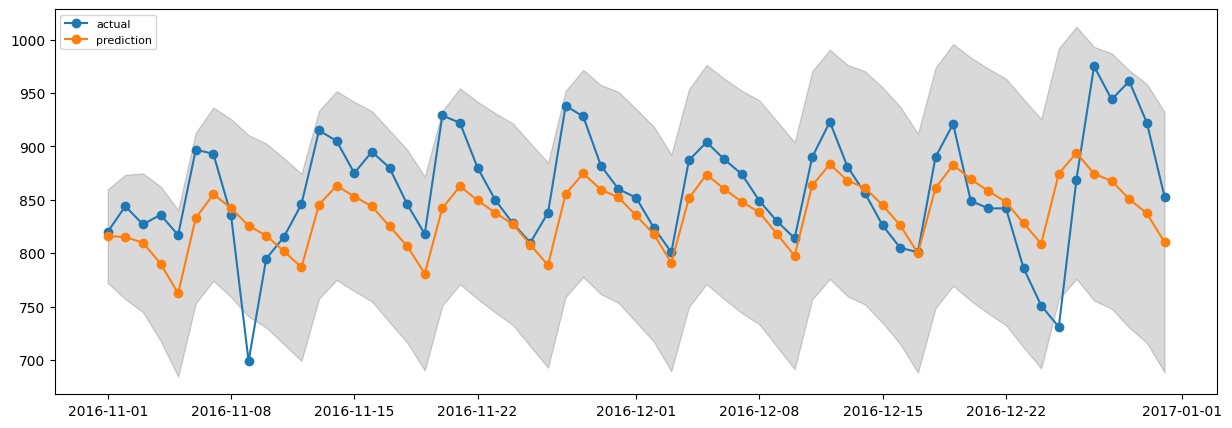

In [ ]:
test_x[['lower', 'upper']] = model.get_forecast(steps=61, exog=exog_forecast).conf_int(0.1).values

plt.figure(figsize=(15,5))
# plt.plot(train_x['Sales'][-50:], '-o', label='training')
plt.plot(test_x['english'], '-o', label='actual')
plt.plot(predictions, '-o', label='prediction')
plt.fill_between(test_x.index, test_x['lower'], test_x['upper'],
                 color='k', alpha=.15)
plt.legend(loc='upper left', fontsize=8)
plt.show()

**Use facebook prophet for forecasting**

**fbprophet relies on pystan , so please try installing pystan first and switch fbprophet to prophet (newer version)**

In [ ]:
!python -m pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
df_new = data_TimeSeries.reset_index().loc[:,["index","english","exog"]].rename(columns={"index":"ds","english":"y","exog":"holiday"})

In [ ]:
df_new.head()

language,ds,y,holiday
0,2015-07-01,427.0,0
1,2015-07-02,425.0,0
2,2015-07-03,403.0,0
3,2015-07-04,394.0,0
4,2015-07-05,425.0,0


In [ ]:
df_new.shape

(550, 3)

**fbprophet without exog data**

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvsrdh829/8n6kdpp5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvsrdh829/l05qj3ja.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36785', 'data', 'file=/tmp/tmpvsrdh829/8n6kdpp5.json', 'init=/tmp/tmpvsrdh829/l05qj3ja.json', 'output', 'file=/tmp/tmpvsrdh829/prophet_model554v71a7/prophet_model-20240520142248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


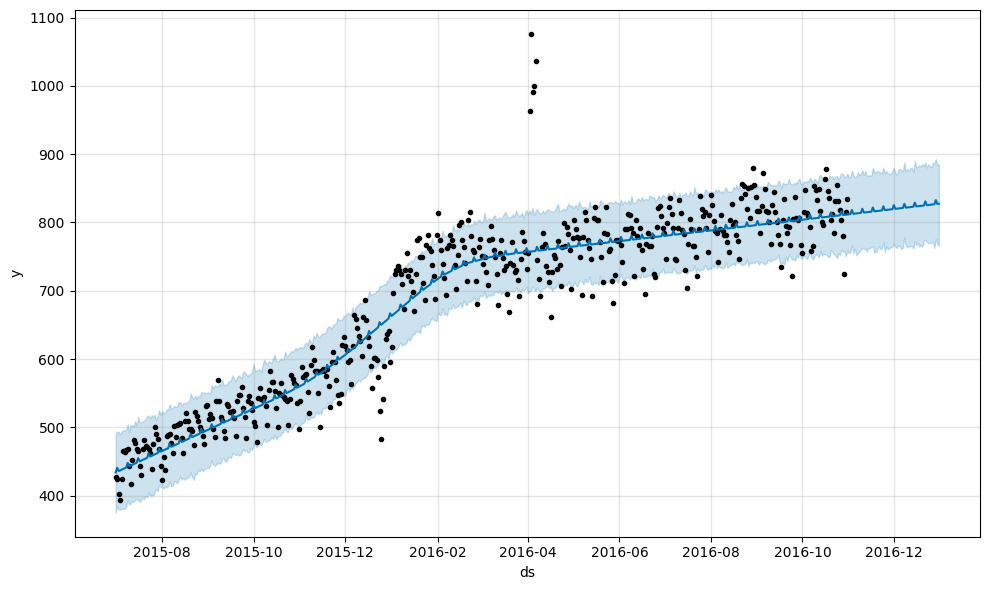

In [ ]:
m = Prophet()
m.fit(df_new.loc[:,["ds","y"]][:-61])
future = m.make_future_dataframe(periods=61, freq='D')
forecast = m.predict(future)
m.plot(forecast);

In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
forecast["yhat"].head()

0    434.048894
1    440.883094
2    436.074480
3    437.087095
4    438.099888
Name: yhat, dtype: float64

In [ ]:
forecast["yhat"].shape

(550,)

In [ ]:
pd.concat([df_new,forecast[["yhat"]]], axis=1).tail()

,ds,y,holiday,yhat
545,2016-12-27,975.0,1,826.337545
546,2016-12-28,944.0,1,826.594335
547,2016-12-29,961.0,1,832.672711
548,2016-12-30,922.0,0,827.108271
549,2016-12-31,853.0,0,827.365061


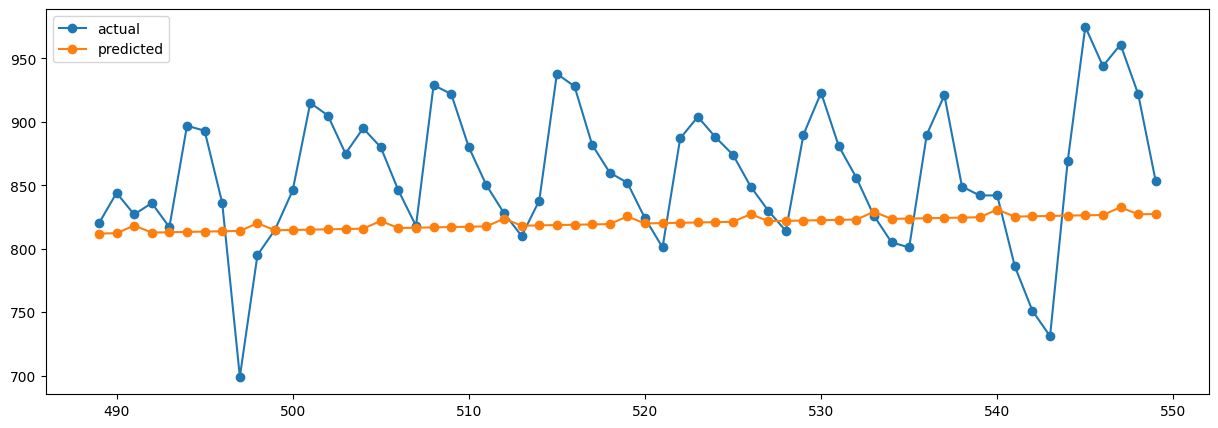

In [ ]:
df_new["y"][-61:].plot(style="-o",figsize=(15,5), label="actual")
forecast["yhat"][-61:].plot(style="-o",label="predicted")
plt.legend()

In [ ]:
performance(df_new["y"][-61:], forecast["yhat"][-61:])

MAE : 51.972
RMSE : 65.078
MAPE: 0.059


**fbprophet with exog data**

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvsrdh829/v5gx520q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvsrdh829/cmq3eb1d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85169', 'data', 'file=/tmp/tmpvsrdh829/v5gx520q.json', 'init=/tmp/tmpvsrdh829/cmq3eb1d.json', 'output', 'file=/tmp/tmpvsrdh829/prophet_model9zpzuzkk/prophet_model-20240520142250.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


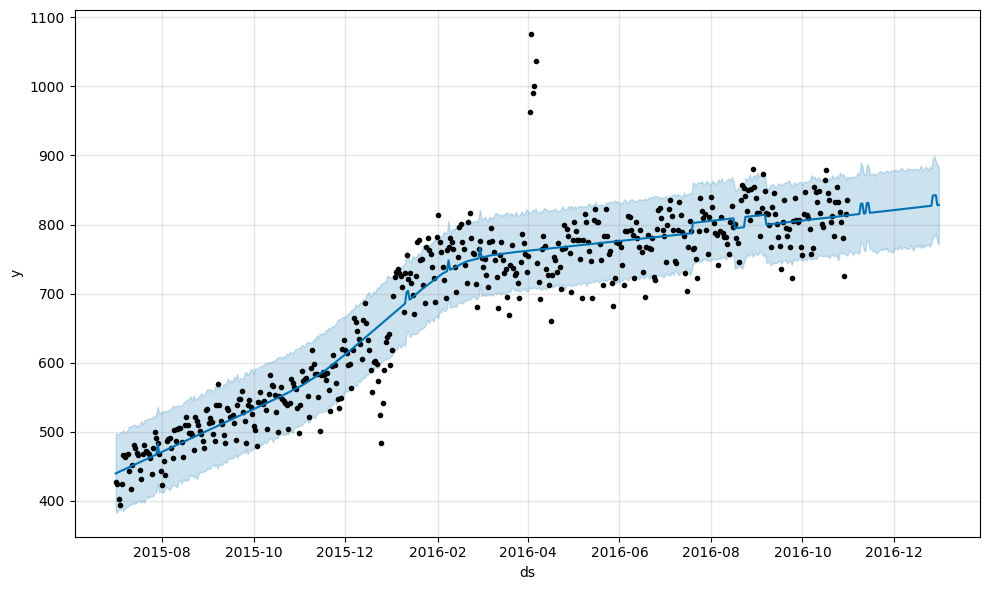

In [ ]:
model2=Prophet(yearly_seasonality=True, weekly_seasonality=True)
model2.add_regressor('holiday') #adding holidays data in the model2
model2.fit(df_new[:-61])
forecast2 = model2.predict(df_new)
fig = model2.plot(forecast2)

In [ ]:
forecast2.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-07-01,427.212888,385.129667,497.498897,427.212888,427.212888,12.332174,12.332174,12.332174,2.901688,...,2.176266,2.176266,2.176266,7.25422,7.25422,7.25422,0.0,0.0,0.0,439.545062
1,2015-07-02,428.224734,382.611975,497.091393,428.224734,428.224734,12.332174,12.332174,12.332174,2.901688,...,2.176266,2.176266,2.176266,7.25422,7.25422,7.25422,0.0,0.0,0.0,440.556907
2,2015-07-03,429.236579,387.762836,496.513407,429.236579,429.236579,12.332174,12.332174,12.332174,2.901688,...,2.176266,2.176266,2.176266,7.25422,7.25422,7.25422,0.0,0.0,0.0,441.568753
3,2015-07-04,430.248425,387.408185,498.645920,430.248425,430.248425,12.332174,12.332174,12.332174,2.901688,...,2.176266,2.176266,2.176266,7.25422,7.25422,7.25422,0.0,0.0,0.0,442.580599
4,2015-07-05,431.260271,389.726489,498.909374,431.260271,431.260271,12.332174,12.332174,12.332174,2.901688,...,2.176266,2.176266,2.176266,7.25422,7.25422,7.25422,0.0,0.0,0.0,443.592445


In [ ]:
forecast2.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'extra_regressors_additive',
       'extra_regressors_additive_lower', 'extra_regressors_additive_upper',
       'holiday', 'holiday_lower', 'holiday_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
forecast2["yhat"].head()

0    439.545062
1    440.556907
2    441.568753
3    442.580599
4    443.592445
Name: yhat, dtype: float64

In [ ]:
forecast2["yhat"].shape

(550,)

In [ ]:
pd.concat([df_new,forecast2[["yhat"]]], axis=1).tail()

,ds,y,holiday,yhat
545,2016-12-27,975.0,1,842.109952
546,2016-12-28,944.0,1,842.358566
547,2016-12-29,961.0,1,842.607180
548,2016-12-30,922.0,0,828.153115
549,2016-12-31,853.0,0,828.401729


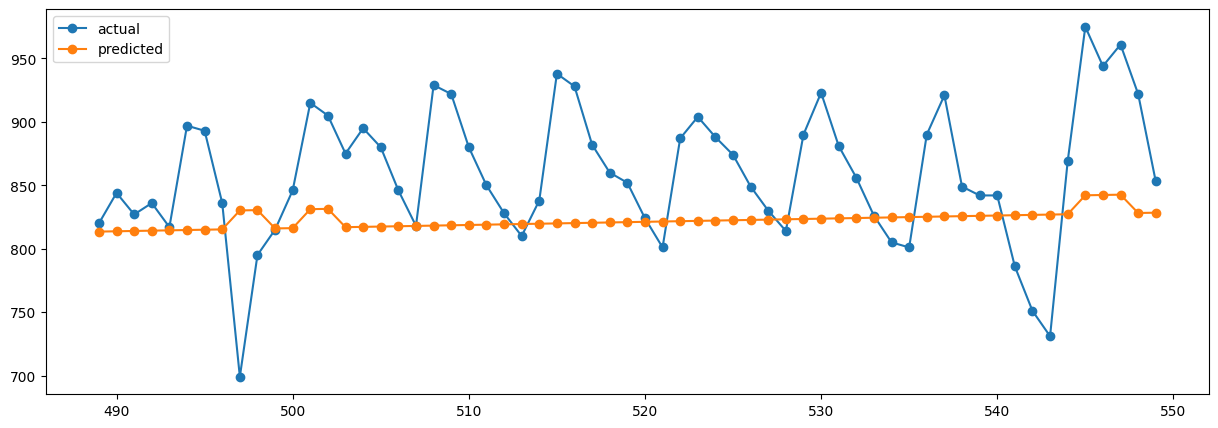

In [ ]:
df_new["y"][-61:].plot(style="-o",figsize=(15,5), label="actual")
forecast2["yhat"][-61:].plot(style="-o",label="predicted")
plt.legend()

In [ ]:
performance(df_new["y"][-61:], forecast2["yhat"][-61:])

MAE : 50.967
RMSE : 63.217
MAPE: 0.058


**Metrics summary of different models for "english" data**

**ARIMA model**

In [ ]:
performance(test_x["english"], pred["english"])

MAE : 58.276
RMSE : 68.523
MAPE: 0.067


**SARIMAX model**

In [ ]:
performance(test_x["english"], predictions)

MAE : 37.861
RMSE : 49.014
MAPE: 0.044


**prophet model without exog data**

In [ ]:
performance(df_new["y"][-61:], forecast["yhat"][-61:])

MAE : 51.972
RMSE : 65.078
MAPE: 0.059


**prophet model with exog data**

In [ ]:
performance(df_new["y"][-61:], forecast2["yhat"][-61:])

MAE : 50.967
RMSE : 63.217
MAPE: 0.058


**Defining functions for all of the tasks**

In [ ]:
def funct_performance(lang, train_x, test_x):
    model4 = SARIMAX(train_x[lang], exog=train_x['exog'], order=(9,1,5),seasonal_order=(2,1,3,14))
    model4 = model4.fit(disp=False)

    exog_forecast4 = test_x[['exog']]  # requires two brackets to yield a shape of 2D
    predictions4 = model4.predict(start=test_x.index[0], end=test_x.index[-1], exog=exog_forecast4).rename('Predictions')
    print("--"*50);print("Metrics for {}".format(lang))
    performance(test_x[lang], predictions4) #it already has print func

**Comparing results for all languages**

In [ ]:
for language in train_x.columns[:-1]:
    funct_performance(language, train_x, test_x)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


----------------------------------------------------------------------------------------------------
Metrics for chinese
MAE : 6.505
RMSE : 7.95
MAPE: 0.057


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


----------------------------------------------------------------------------------------------------
Metrics for english
MAE : 37.861
RMSE : 49.014
MAPE: 0.044


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


----------------------------------------------------------------------------------------------------
Metrics for french
MAE : 13.334
RMSE : 17.855
MAPE: 0.073


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


----------------------------------------------------------------------------------------------------
Metrics for german
MAE : 10.318
RMSE : 13.715
MAPE: 0.06


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


----------------------------------------------------------------------------------------------------
Metrics for japanese
MAE : 9.391
RMSE : 11.731
MAPE: 0.039


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


----------------------------------------------------------------------------------------------------
Metrics for russian
MAE : 20.238
RMSE : 28.806
MAPE: 0.057


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


----------------------------------------------------------------------------------------------------
Metrics for spanish
MAE : 95.36
RMSE : 129.569
MAPE: 0.346


**Inferences and recommendations**

**observations**

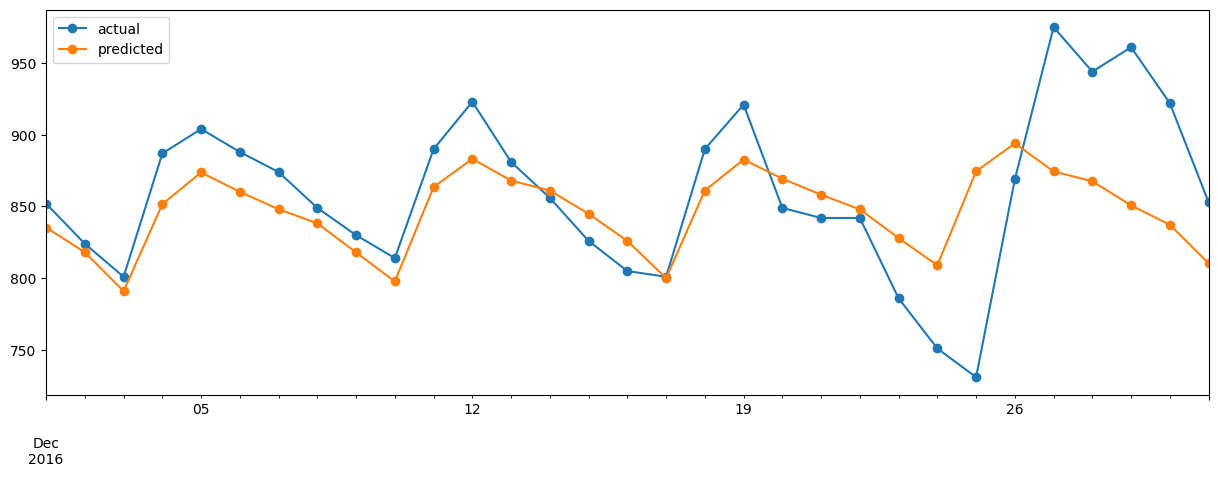

In [ ]:
test_x["english"][-31:].plot(style="-o",figsize=(15,5), label="actual")
predictions[-31:].plot(style="-o",label="predicted")
plt.legend()

In [ ]:
pd.DataFrame({"actual":test_x["english"][-31:],"predicted":predictions[-31:],"days":pd.Series(test_x["english"][-31:].index).dt.day_name().values})[:20].T

,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20
actual,852.0,824.0,801.0,887.0,904.0,888.0,874.0,849.0,830.0,814.0,890.0,923.0,881.0,856.0,826.0,805.0,801.0,890.0,921.0,849.0
predicted,835.344511,818.067784,790.977468,851.591429,873.703558,860.230694,848.10608,838.243607,817.983231,797.704709,863.556304,883.21091,868.059662,861.110751,844.9113,825.987232,800.068258,861.138812,882.726425,869.363136
days,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Monday,Tuesday


1.   Viewers on page is very low during Thursday, Friday, Saturday

2.   Viewers on page is very high during Sunday, Monday, Tuesday

3.   Viewers on page is average on Wednesday

4.   Most viewed page by languges are english(33.65%), spanish(21.44%), russian(15%), japanese(10.8%), french(7.13%), german(7%), chinese(5%)

**Recommendations**

1.   Ads should be shown only during Sunday, Monday, Tuesday and Wednesday as these days have highest and average viewers on page and it's periodic by osbservations of predicted data

2.   Ads budget should be divided in proportion to percentage of viewers page-language wise, for example english-pages have the most viewers and chinese-pages have least viewers so maximum part of budget should be allocated for english page and minimum part of budget should be allocated for chinese page

3.   Prioritize English language pages due to their low MAPE and high mean visits, making them optimal for advertising efforts to maximize reach and effectiveness.

4.   Avoid advertising on Chinese language pages unless there's a specific marketing strategy tailored for Chinese populations, as they have the lowest number of visits.

5.   Russian language pages present a promising opportunity for high conversion rates with their decent number of visits and low MAPE if utilized effectively.

6.   Despite having the second-highest number of visits, Spanish language pages exhibit the highest MAPE, suggesting that advertisements on these pages may not effectively reach the intended audience.

7.   French, German, and Japanese language pages show moderate levels of visits and MAPE. Depending on the target customers, consider advertising campaigns on these pages to capitalize on their potential reach and conversion rates.

**Questionnaire**

1.   **Defining the problem statements and where can this and modifications of this be used?**

**ANS:**

 Forecasting the number of views to predict and optimize the ad placement. This method of forecasting can be used to predict no. of customers on offer/sales day to optimise the revenue as well as manage the resources.


2.   **Write 3 inferences you made from the data visualizations**

**ANS:**

*   2.1. Most viewed page by languges are english(33.65%), spanish(21.44%), russian(15%), japanese(10.8%), french(7.13%), german(7%), chinese(5%)
*   2.2. access_type: all-access(50%), mobile-web(25.37%), desktop(23.85%)
*   2.3. access-origin: all-agents(75.30%), spider(24.69%)

3.   **What does the decomposition of series do?**

**ANS:**

It decomposes the series in three parts trend, sesonality and residuals



4.   **What level of differencing gave you a stationary series?**

**ANS:**

1-level of differentiation


5.   **Difference between arima, sarima & sarimax.**

**ANS:**

*   ARIMA models can handle trend but can't handle sesonality and exogenous data
*   SARIMA model can handle trend and seasonality but can't handle exogenous data
*   SARIMAX model can handle trend, seasonality and exogenous data but one of the drawbacks of the SARIMAX Model is that one cannot have multiple seasonality

6.   **Compare the number of views in different languages**

**ANS:**

Most viewed page by languges are **English(33.65%), Spanish(21.44%), Russian(15%), Japanese(10.8%), French(7.13%), German(7%), Chinese(5%)**

7.   **What other methods other than grid search would be suitable to get the model for all languages?**

**ANS:**

Creating own custom methods would be suitable to get the model for all languages